# Pre-processing

Importing and standarizing images


In [ ]:
!git clone https://github.com/NetworkAI-UniAndes/classification-exam-fisi-3650.git

Cloning into 'classification-exam-fisi-3650'...
remote: Enumerating objects: 59724, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 59724 (delta 0), reused 1 (delta 0), pack-reused 59720
Receiving objects: 100% (59724/59724), 162.83 MiB | 27.50 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (60012/60012), done.


In [ ]:
import tensorflow as tf
batch_size = 32
img_height = 128
img_width = 128

#Defining source paths of the data set:
data_dir = '/content/classification-exam-fisi-3650/Rice_Image_Dataset/Train'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 50000 files belonging to 5 classes.
Using 40000 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 50000 files belonging to 5 classes.
Using 10000 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


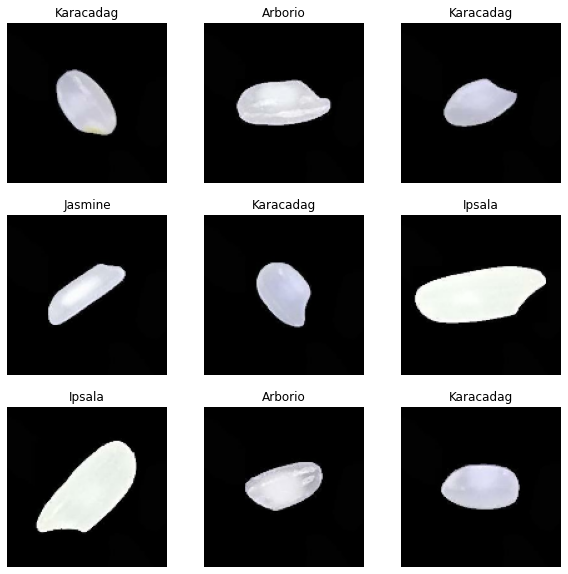

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


##Model

In [ ]:
#Model for the Neural Network
num_classes = 5

model = tf.keras.models.Sequential([
    #normalization layer
    tf.keras.layers.Rescaling(1./255),
    #three convolutional layers                               
    tf.keras.layers.Conv2D(16, (5,5), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    #Removing neurons
    tf.keras.layers.Dropout(0.5),
    #Combining filtered data
    tf.keras.layers.Flatten(),
    #standard layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

#Compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Training of the model
history = model.fit(
    train_ds,
    epochs = 3,
    validation_data = val_ds,
    batch_size = 64
)
print('Model training success!')

Epoch 1/3
1250/1250 [==============================] - 55s 35ms/step - loss: 0.1641 - accuracy: 0.9665 - val_loss: 0.1131 - val_accuracy: 0.9717
Epoch 2/3
1250/1250 [==============================] - 37s 29ms/step - loss: 0.0440 - accuracy: 0.9868 - val_loss: 0.0426 - val_accuracy: 0.9888
Epoch 3/3
1250/1250 [==============================] - 38s 30ms/step - loss: 0.0416 - accuracy: 0.9872 - val_loss: 4.6989 - val_accuracy: 0.6017
Model training success!


In [ ]:
#Exporting the model
model.save('Rice_model.h5')

##Model 2 (AlexNet)

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),    

    tf.keras.layers.Conv2D(96, 11, strides = 4, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = 3, strides = 2),

    tf.keras.layers.Conv2D(256, 5, strides = 1, activation='relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = 3,strides = 2),

    tf.keras.layers.Conv2D(384, 3, strides = 1, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(384, 3, strides = 1, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, 3, strides = 1, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = 3,strides = 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(5, activation = 'softmax')
])

model2.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training of the model
history2 = model2.fit(
    train_ds,
    epochs = 3,
    validation_data = val_ds,
    batch_size = 64
)
print('Model 2 training success!')

Epoch 1/3
1250/1250 [==============================] - 50s 30ms/step - loss: 0.2329 - accuracy: 0.9219 - val_loss: 0.0533 - val_accuracy: 0.9829
Epoch 2/3
1250/1250 [==============================] - 38s 30ms/step - loss: 0.0579 - accuracy: 0.9807 - val_loss: 0.0320 - val_accuracy: 0.9898
Epoch 3/3
1250/1250 [==============================] - 37s 30ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0488 - val_accuracy: 0.9840
Model 2 training success!


In [ ]:
model2.save('Rice_model_Alexnet.h5')

In [ ]:
import numpy as np

from tensorflow.keras.models import load_model

class Model:
    #Loading pre-trained model
    
    def preprocess(self, file_path):
        img = tf.keras.preprocessing.image.load_img(file_path, target_size=(128,128))
        img_norm = tf.keras.preprocessing.image.img_to_array(img)
        img_f = np.array([img_norm])
        return img_f
    
    def predict(self, file_path):
        model_path = '/content/drive/MyDrive/Rice_model_Alexnet.h5'
        model = load_model(model_path)
        x = model.predict(self.preprocess(file_path))
        y = np.argmax(x[0])
        return x

In [ ]:
def load_test_paths(base_path):
    label_dict={'Arborio':0,'basmati':1,'Ipsala':2,'Jasmine':3,'Karacadag':4}
    filenames = os.walk(base_path)
    files=list(filenames)[0][2]
    files=[file for file in files if file.endswith(".jpg")]
    labels=[label_dict[file.split(' ')[0]] for file in files]
    file_df=pd.DataFrame({"file":files,"label":labels})
    file_df["file"]=file_df.file.map(lambda x: os.path.join(base_path,x))
    return file_df

In [ ]:
import pandas as pd
import os

Test_data=load_test_paths('/content/classification-exam-fisi-3650/Rice_Image_Dataset/Test')
    
#load model
model=Model()
Test_data['prediction']=Test_data.file.map(model.predict)
accuracy=(Test_data['label']==Test_data['prediction']).sum()/Test_data.shape[0]
print("You got {}% accuracy".format(round(accuracy*100,2)))